<a href="https://colab.research.google.com/github/AASTHA1102/Machine-Learning/blob/main/DeepLearning_Project_1_MNISTFashionDatasetClassification_27_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LOADING DATASET**

In [ ]:
import tensorflow as tf
import numpy as np
fas_data=tf.keras.datasets.fashion_mnist
(train_image,train_label),(test_image,test_label)=fas_data.load_data()

In [ ]:
# EXPLORE THE DATA
print(train_image.shape)

(60000, 28, 28)


In [ ]:
print(train_label[0:20])

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4]


In [ ]:
print(np.unique(train_label))

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
print("NUMBER OF CLASS",len(np.unique(train_label)))

NUMBER OF CLASS 10


In [ ]:
print(test_image.shape)


(10000, 28, 28)


In [ ]:
print(np.unique(test_label))

[0 1 2 3 4 5 6 7 8 9]


(28, 28)


Text(0.5, 0, 'Bag')

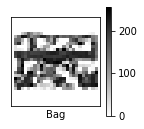

In [ ]:
#EXPLORING THE IMAGE
i=10000
print(train_image[i].shape)
class_name=['TShirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
#####################################################
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(train_image[i],cmap=plt.cm.binary)
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.xlabel(class_name[train_label[i]])

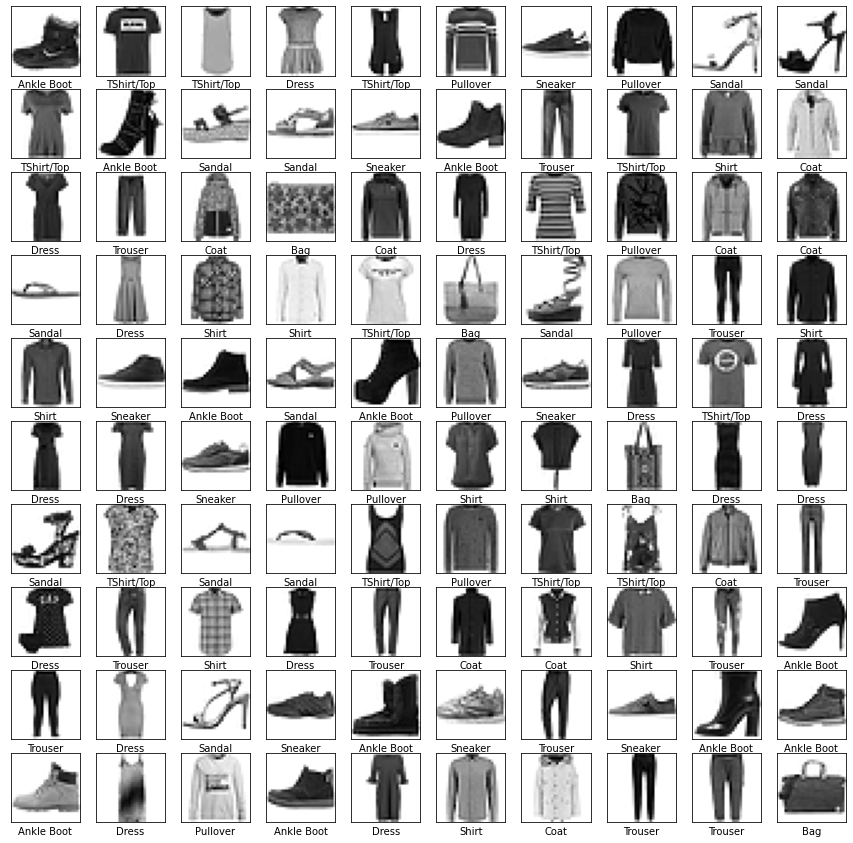

In [ ]:
#Vizualize first 100 image
plt.figure(figsize=(15,15))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.imshow(train_image[i],cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.xlabel(class_name[train_label[i]])
plt.show()

In [ ]:
train_image[i]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,   0,  57,
         78,  87,  47,  25,   4,   0,   0,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  12, 154, 123,
         33,  57,  48,  82, 118,  56,   0,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   2,   0,  94, 125,   0,
          0,   0,   0,   0,  86, 203,  39,   0,   5,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
# Data Preprocessing
#input data = scaling pixel values [0-1]

train_image=train_image/255.0
test_image=test_image/255.0

In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
hist=model.fit(train_image,train_label,epochs=10,validation_split=0.2,batch_size=100)

Epoch 1/10
480/480 [==============================] - 3s 6ms/step - loss: 0.5725 - accuracy: 0.7989 - val_loss: 0.4571 - val_accuracy: 0.8397
Epoch 2/10
480/480 [==============================] - 3s 5ms/step - loss: 0.4652 - accuracy: 0.8381 - val_loss: 0.4634 - val_accuracy: 0.8357
Epoch 3/10
480/480 [==============================] - 3s 5ms/step - loss: 0.4438 - accuracy: 0.8453 - val_loss: 0.4418 - val_accuracy: 0.8438
Epoch 4/10
480/480 [==============================] - 3s 5ms/step - loss: 0.4360 - accuracy: 0.8473 - val_loss: 0.4391 - val_accuracy: 0.8487
Epoch 5/10
480/480 [==============================] - 4s 8ms/step - loss: 0.4278 - accuracy: 0.8504 - val_loss: 0.4733 - val_accuracy: 0.8362
Epoch 6/10
480/480 [==============================] - 5s 10ms/step - loss: 0.4205 - accuracy: 0.8505 - val_loss: 0.4429 - val_accuracy: 0.8456
Epoch 7/10
480/480 [==============================] - 4s 9ms/step - loss: 0.4189 - accuracy: 0.8538 - val_loss: 0.4504 - val_accuracy: 0.8407
Epoch

In [ ]:
model.save('fashionImgModel')

In [ ]:
test_loss,test_acc=model.evaluate(test_image,test_label)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.4696 - accuracy: 0.8372
0.8371999859809875


In [ ]:
d=hist.history
d.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

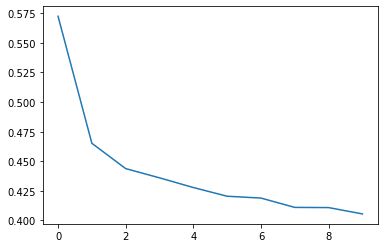

In [ ]:
plt.plot(range(10),d['loss'])

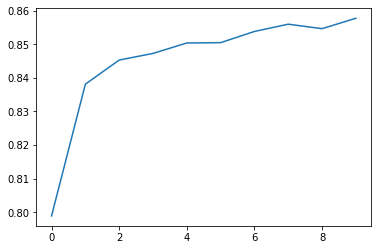

In [ ]:
plt.plot(range(10),d['accuracy'])

In [ ]:
# predict all 10000 image
pred=model.predict(test_image) 
print(pred)

[[8.6176369e-06 2.0110078e-07 3.5080127e-05 ... 3.8644250e-02
  1.8386793e-03 8.7535012e-01]
 [1.5038250e-04 2.7643314e-09 9.4080776e-01 ... 9.6648173e-17
  3.9052907e-07 1.1488852e-18]
 [5.8680929e-05 9.9974352e-01 1.8593984e-05 ... 1.9694034e-13
  4.8141278e-08 1.0836930e-15]
 ...
 [2.7896675e-01 2.8593047e-07 4.2493842e-03 ... 6.9298761e-07
  2.0928173e-01 1.0543937e-08]
 [6.4203559e-06 9.9308747e-01 5.1556253e-06 ... 5.6187557e-09
  2.2220446e-08 8.4288327e-09]
 [2.6703510e-04 3.7165639e-05 9.5444254e-04 ... 1.1308109e-02
  7.8034988e-03 3.4662659e-04]]


In [ ]:
p=np.argmax(pred,axis=1)
print(p[0:10])
print(test_label[0:10])

[9 2 1 1 6 1 4 6 5 7]
[9 2 1 1 6 1 4 6 5 7]


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(p,test_label)
print(cm)

[[837   3  27  28   0   0 173   0   6   0]
 [  1 929   0   2   0   0   1   0   1   0]
 [ 12   7 681   6  82   0 104   0  10   0]
 [ 62  52  23 900  50   1  50   0  14   0]
 [  7   6 178  22 802   0 144   0  13   0]
 [  1   0   0   0   0 916   0  29   3  17]
 [ 71   3  88  42  65   0 521   0  35   2]
 [  1   0   1   0   0  55   0 928   4  37]
 [  8   0   2   0   1  10   7   1 914   0]
 [  0   0   0   0   0  18   0  42   0 944]]


In [ ]:
i=1000
# class_name=['TShirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

print(pred[i])
print('Predicted Label',tf.argmax(pred[i]).numpy())
print('Predicted Class',class_name[tf.argmax(pred[i]).numpy()])

print('Target Class',class_name[test_label[i]])
print('Probability',tf.reduce_max(pred[i]).numpy()*100)


[7.9988670e-01 2.9471579e-08 1.2347557e-02 1.4761582e-04 1.9826321e-05
 2.0316750e-12 1.8753292e-01 1.4770589e-12 6.5339780e-05 4.0177952e-13]
Predicted Label 0
Predicted Class TShirt/Top
Target Class TShirt/Top
Probability 79.9886703491211


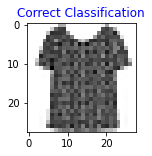

In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(test_image[i],cmap=plt.cm.binary)
pc=class_name[tf.argmax(pred[i]).numpy()]
tc=class_name[test_label[i]]
if pc==tc:
  plt.title('Correct Classification',c='b')
else:
  plt.title('Wrong Classification',color='r')

In [ ]:
# PREDICT SINGLR IMAGE
i=10
img=test_image[i]
print(img.shape) #28 X 28
img=tf.expand_dims(img,0)
print(img.shape)
pred=model.predict(img)   #1X28X28
print(pred[0])

print('Predicted Label',tf.argmax(pred[0]).numpy())
print('Predicted Class',class_name[tf.argmax(pred[0]).numpy()])
print('Probability',tf.reduce_max(pred[0]).numpy()*100)

(28, 28)
(1, 28, 28)
[6.2393700e-04 1.0913179e-04 1.8234468e-01 2.8713776e-03 7.6623178e-01
 1.7289820e-10 4.7807578e-02 2.4000897e-12 1.1475847e-05 1.2512711e-12]
Predicted Label 4
Predicted Class Coat
Probability 76.62317752838135
